In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [2]:
time.time()

1584981823.646223

In [3]:
data = pd.read_csv('../_data/cluster_data.csv').drop(labels = ['SK_ID_CURR'], axis = 1)

In [10]:
data.shape

(307511, 328)

In [20]:
(data.columns)[:100]

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE',

In [88]:
data_small = data.sample(frac = 0.2)[(data.columns)[:100]]

In [89]:
data_small.shape

(61502, 100)

In [90]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [91]:
cluster.fit_predict(data_small)

MemoryError: unable to allocate array data.

In [ ]:
pd.Series(cluster.labels_).value_counts()

In [85]:
data_small['cluster_labels'] = cluster.labels_

In [86]:
def boxplot_by_cluster(data, cluster_label, feature):
    """
    """
    
    grouped_features = list()
    labels = np.unique(data[cluster_label])
    
    for label in labels:
        grouped_features.append(
            data.query(str(cluster_label) + " == " + str(label))[feature]
        )
    plt.boxplot(grouped_features)

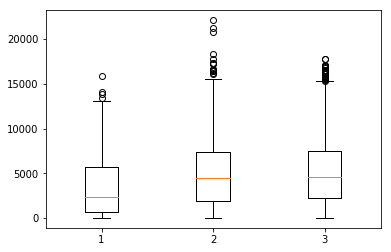

In [87]:
boxplot_by_cluster(data_small, 'cluster_labels', 'DAYS_REGISTRATION')

In [79]:
pd.crosstab(data_small.cluster_labels, data_small.FLAG_EMAIL)

FLAG_EMAIL          0    1
cluster_labels            
0               14159  786
1                 383   48

In [14]:
data_small = data.sample(frac = 0.2)[(data.columns)]

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [104]:
data_small.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61502 entries, 264501 to 34316
Data columns (total 328 columns):
TARGET                                                              int64
NAME_CONTRACT_TYPE                                                  int64
CODE_GENDER                                                         int64
FLAG_OWN_CAR                                                        int64
FLAG_OWN_REALTY                                                     int64
AMT_INCOME_TOTAL                                                    float64
AMT_CREDIT                                                          float64
AMT_ANNUITY                                                         float64
AMT_GOODS_PRICE                                                     float64
NAME_TYPE_SUITE                                                     int64
NAME_INCOME_TYPE                                                    int64
NAME_EDUCATION_TYPE                                            

In [366]:
cov_matrix = data.iloc[:, :100].corr()

In [365]:
data.iloc[:, :100].shape

(307511, 100)

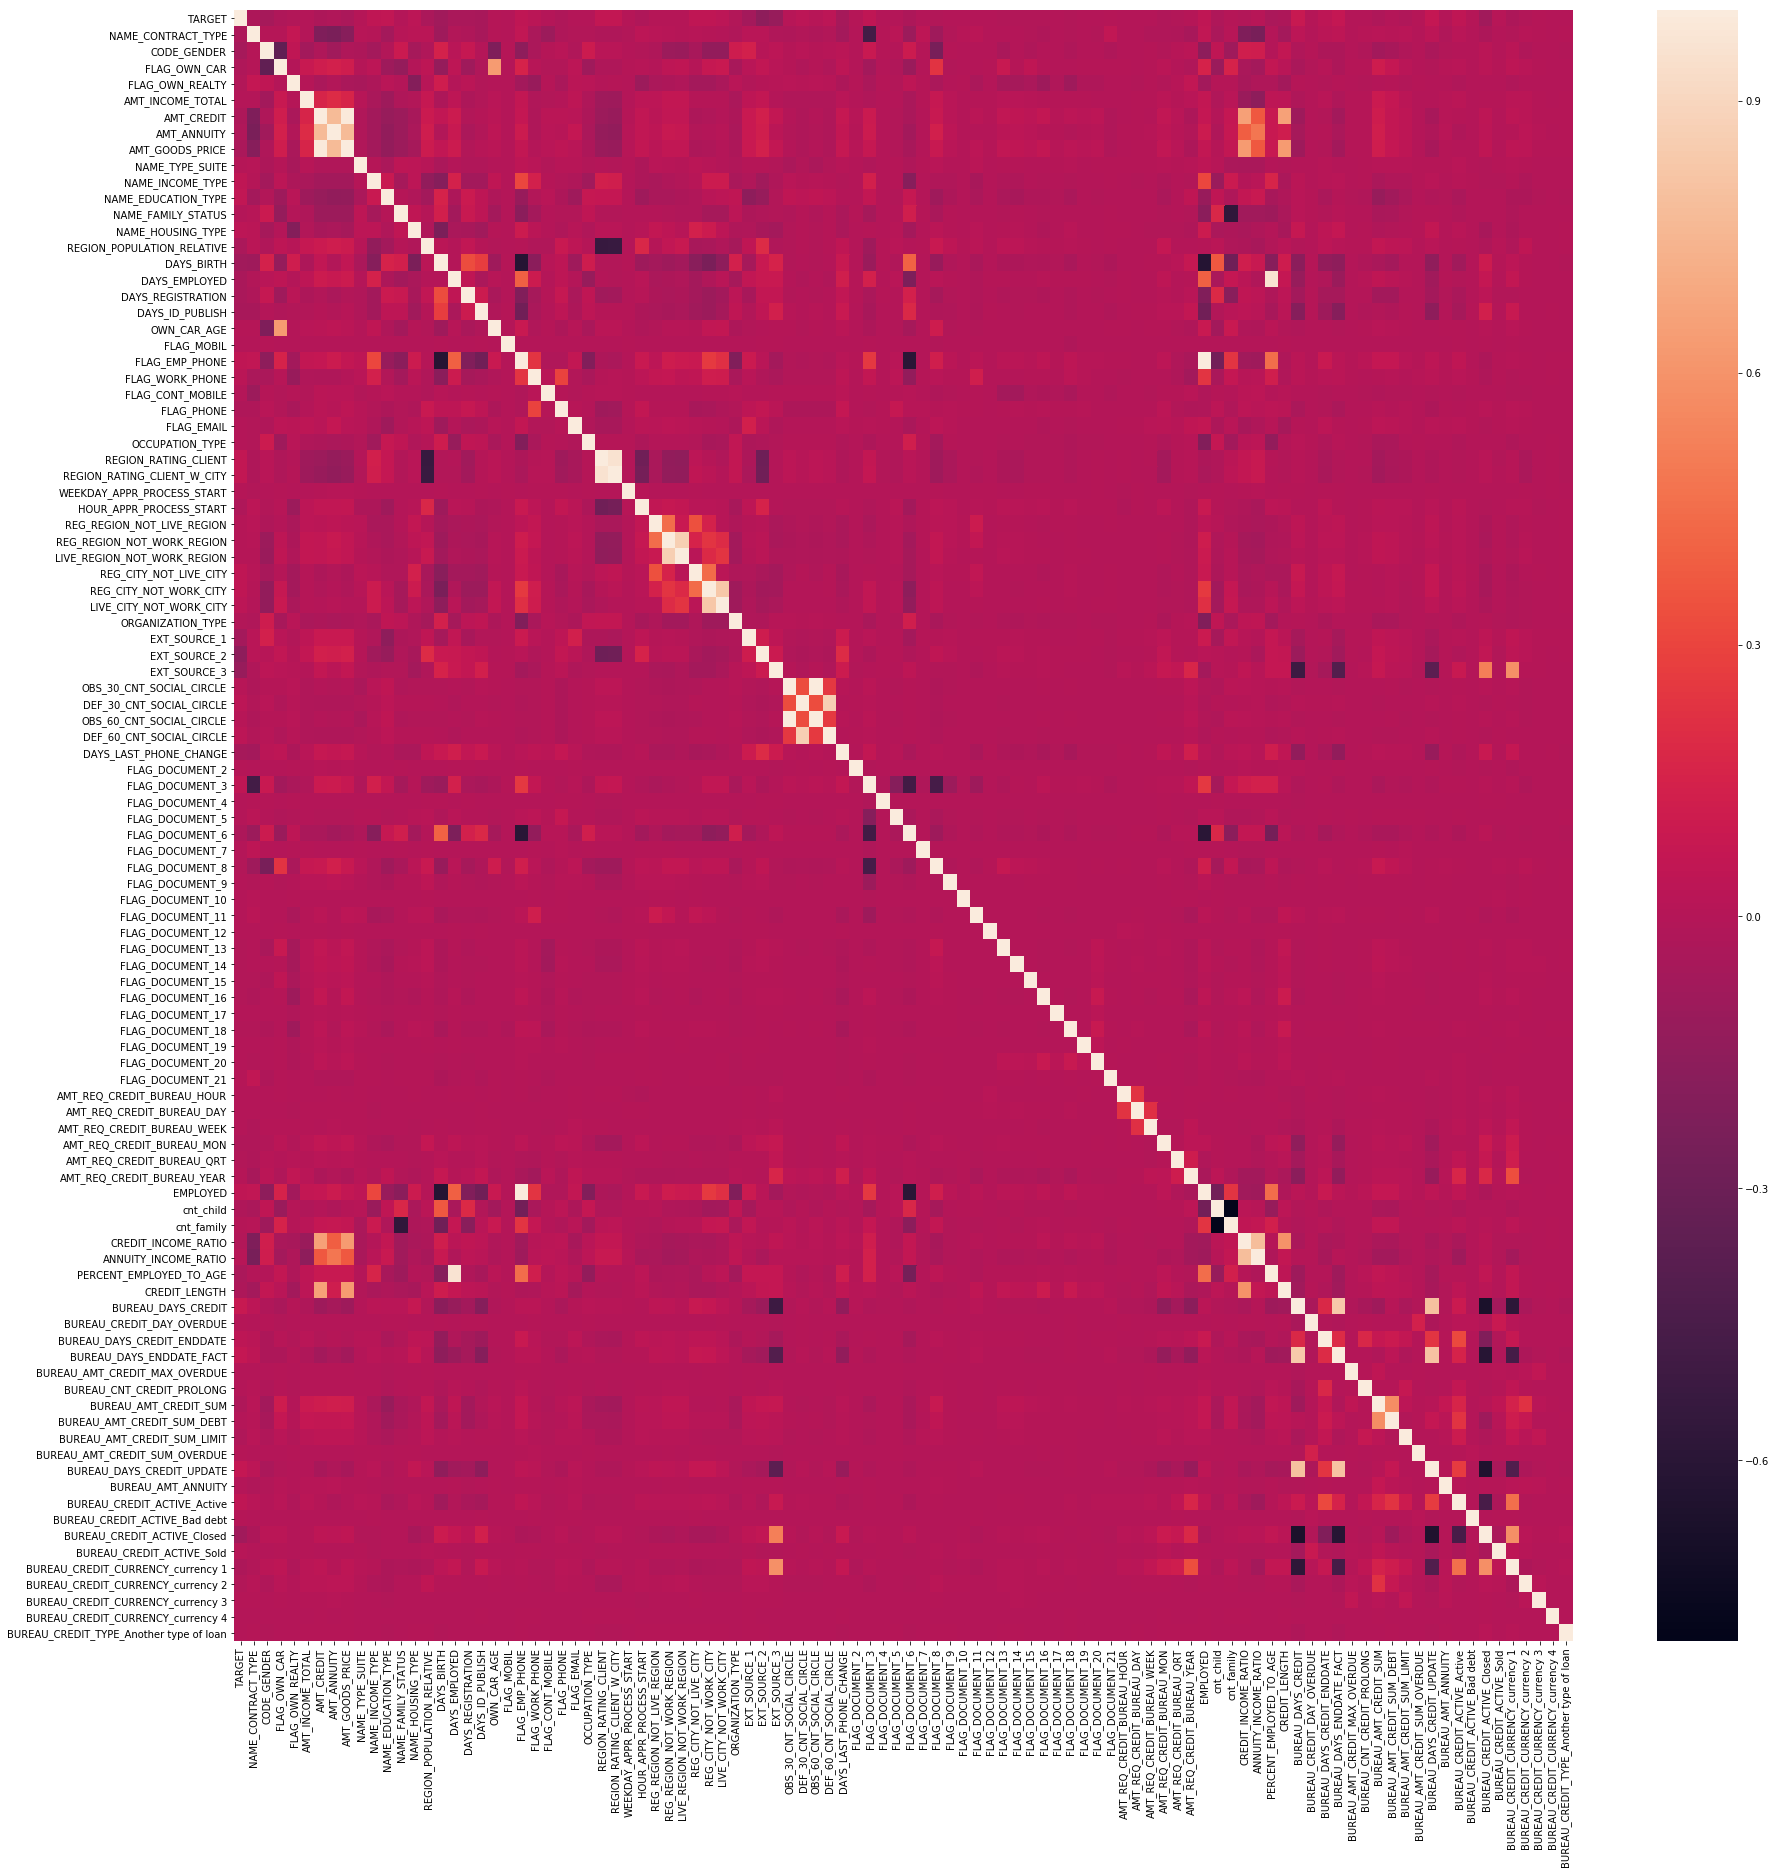

In [368]:
plt.figure(figsize = (30, 30))
sns.heatmap(cov_matrix)

In [108]:
run_times = 10
results = dict()

for cluster_size in [x for x in range(2,15,1)]:
    temp = list()
    for iterr in range(run_times):
        km = KMeans()
        km.fit(data_small)
        temp.append(km.inertia_)
    results[cluster_size] = temp

In [109]:
vals = list()
keys = list()
for key in results.keys():
    vals.append(np.mean(results[key]))
    keys.append(key)
    print(key, np.mean(results[key]))

2 3.000382175010209e+16
3 3.002674018469149e+16
4 3.0010483537508052e+16
5 3.002849128141486e+16
6 3.0000238381604936e+16
7 2.999286234219443e+16
8 2.9995933340901016e+16
9 3.0018936397597164e+16
10 2.9994434653106956e+16
11 3.001614131212924e+16
12 2.9993415976973356e+16
13 3.0016525453333856e+16
14 3.00176951847146e+16


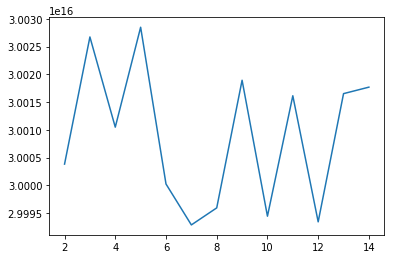

In [110]:
plt.plot(keys, vals)

In [105]:
km = KMeans()
km.fit(data_small)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [332]:
from mpl_toolkits.mplot3d import Axes3D

In [370]:
data.query('TARGET == 1').BUREAU_CREDIT_ACTIVE_Closed.describe()

count    24825.000000
mean         0.408975
std          0.344913
min          0.000000
25%          0.000000
50%          0.450000
75%          0.666667
max          1.000000
Name: BUREAU_CREDIT_ACTIVE_Closed, dtype: float64

Text(0.5,0,'EXT_SOURCE_3')

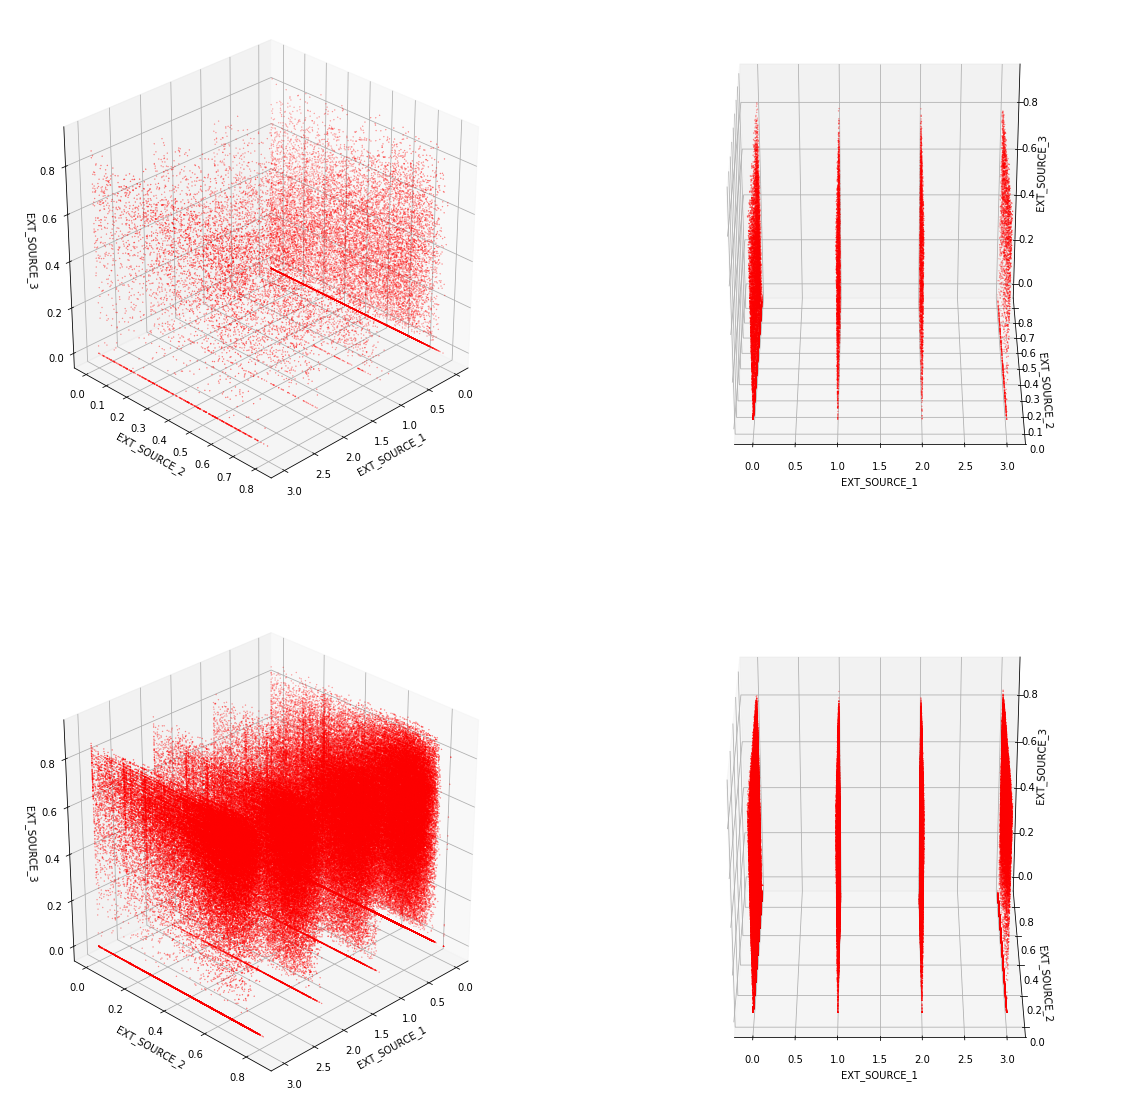

In [383]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221, projection = '3d')

colors = ['r','g']
markers = ['o', '|']

# for each index and class in:

ax1.view_init(30, 45)

ax1.scatter3D(data.query('TARGET == 1').BCA_Closed_en,
            data.query('TARGET == 1').EXT_SOURCE_2,
            data.query('TARGET == 1').EXT_SOURCE_3,
            s=0.1,
            c = 'red',
            cmap = 'viridis');

ax1.set_xlabel('EXT_SOURCE_1')
ax1.set_ylabel('EXT_SOURCE_2')
ax1.set_zlabel('EXT_SOURCE_3')

ax2 = fig.add_subplot(222, projection = '3d')

colors = ['r','g']
markers = ['o', '|']

# for each index and class in:

ax2.view_init(30, 270)

ax2.scatter3D(data.query('TARGET == 1').BCA_Closed_en,
            data.query('TARGET == 1').EXT_SOURCE_2,
            data.query('TARGET == 1').EXT_SOURCE_3,
            s=0.1,
            c = 'red',
            cmap = 'viridis');
ax2.set_xlabel('EXT_SOURCE_1')
ax2.set_ylabel('EXT_SOURCE_2')
ax2.set_zlabel('EXT_SOURCE_3')

# Non-default

ax3 = fig.add_subplot(223, projection = '3d')

colors = ['r','g']
markers = ['o', '|']

# for each index and class in:

ax3.view_init(30, 45)

ax3.scatter3D(data.query('TARGET == 0').BCA_Closed_en,
            data.query('TARGET == 0').EXT_SOURCE_2,
            data.query('TARGET == 0').EXT_SOURCE_3,
            s=0.1,
            c = 'red',
            cmap = 'viridis');

ax3.set_xlabel('EXT_SOURCE_1')
ax3.set_ylabel('EXT_SOURCE_2')
ax3.set_zlabel('EXT_SOURCE_3')

ax4 = fig.add_subplot(224, projection = '3d')

colors = ['r','g']
markers = ['o', '|']

# for each index and class in:

ax4.view_init(30, 270)

ax4.scatter3D(data.query('TARGET == 0').BCA_Closed_en,
            data.query('TARGET == 0').EXT_SOURCE_2,
            data.query('TARGET == 0').EXT_SOURCE_3,
            s=0.1,
            c = 'red',
            cmap = 'viridis');
ax4.set_xlabel('EXT_SOURCE_1')
ax4.set_ylabel('EXT_SOURCE_2')
ax4.set_zlabel('EXT_SOURCE_3')

In [392]:
cmp = ListedColormap(['r','b'])

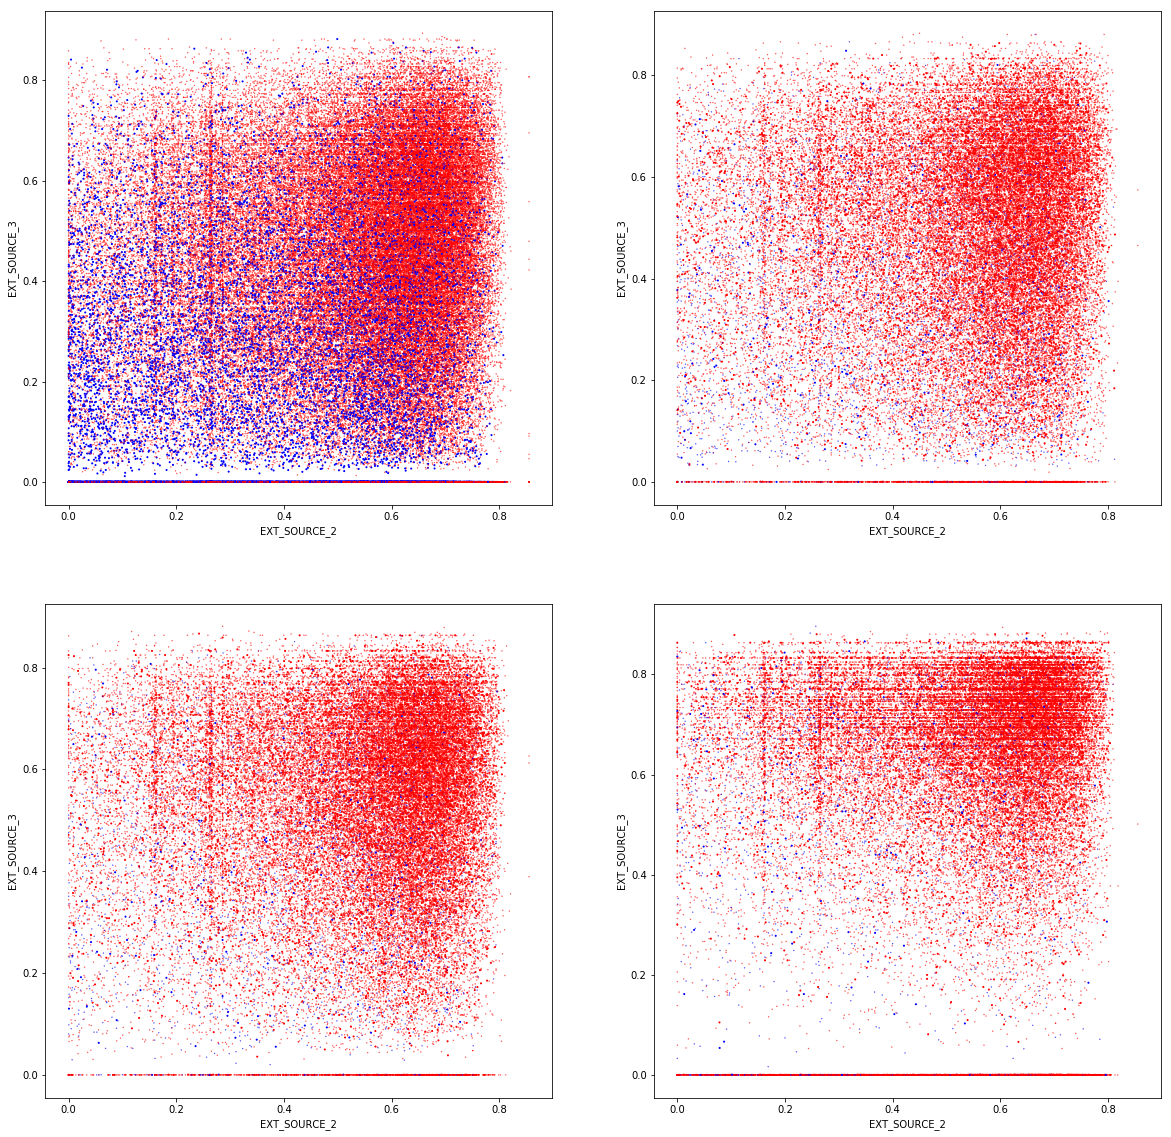

In [396]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)



# for each index and class in:


ax1.scatter(data.query('BCA_Closed_en == 0').EXT_SOURCE_2,
            data.query('BCA_Closed_en == 0').EXT_SOURCE_3,
            s=data.query('BCA_Closed_en == 0').TARGET + 0.1,
            c = cmp(data.query('BCA_Closed_en == 0').TARGET));

ax1.set_xlabel('EXT_SOURCE_2')
ax1.set_ylabel('EXT_SOURCE_3')

ax2 = fig.add_subplot(222)


# for each index and class in:


ax2.scatter(data.query('BCA_Closed_en == 1').EXT_SOURCE_2,
            data.query('BCA_Closed_en == 1').EXT_SOURCE_3,
            s=data.query('BCA_Closed_en == 0').TARGET + 0.1,
            c = cmp(data.query('BCA_Closed_en == 1').TARGET));
ax2.set_xlabel('EXT_SOURCE_2')
ax2.set_ylabel('EXT_SOURCE_3')

# Non-default

ax3 = fig.add_subplot(223)



# for each index and class in:


ax3.scatter(data.query('BCA_Closed_en == 2').EXT_SOURCE_2,
            data.query('BCA_Closed_en == 2').EXT_SOURCE_3,
            s=data.query('BCA_Closed_en == 0').TARGET + 0.1,
            c = cmp(data.query('BCA_Closed_en == 2').TARGET));

ax3.set_xlabel('EXT_SOURCE_2')
ax3.set_ylabel('EXT_SOURCE_3')

ax4 = fig.add_subplot(224,)


# for each index and class in:



ax4.scatter(data.query('BCA_Closed_en == 3').EXT_SOURCE_2,
            data.query('BCA_Closed_en == 3').EXT_SOURCE_3,
            s=data.query('BCA_Closed_en == 0').TARGET + 0.1,
            c = cmp(data.query('BCA_Closed_en == 3').TARGET));
ax4.set_xlabel('EXT_SOURCE_2')
ax4.set_ylabel('EXT_SOURCE_3');

In [381]:
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()

In [382]:
data['BCA_Closed'] = pd.qcut(data['BUREAU_CREDIT_ACTIVE_Closed'],
          q=[0.,0.5  , 0.66666667, 0.83333333, 1.  ],
          labels=['0-5','4-6','6-8','8-1'])
data['BCA_Closed_en'] = ls.fit_transform(data['BCA_Closed'])

In [388]:
max(data.BCA_Closed_en)

3

In [344]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.view_init(30, 45)

ax1.scatter3D(data.query('TARGET == 0').EXT_SOURCE_1,
            data.query('TARGET == 0').EXT_SOURCE_2,
            data.query('TARGET == 0').EXT_SOURCE_3,
            s=0.1,
            c = 'red',
            cmap = 'viridis');

ax2.view_init(30, 90)

ax2.scatter3D(data.query('TARGET == 0').EXT_SOURCE_1,
            data.query('TARGET == 0').EXT_SOURCE_2,
            data.query('TARGET == 0').EXT_SOURCE_3,
            s=0.1,
            c = 'red',
            cmap = 'viridis');

TypeError: __init__() got an unexpected keyword argument 'projection'

In [339]:
n_radii = 8
n_angles = 36
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
z1 = np.sin(-x*y)
z2 = np.cos(x**2)

print('x.shape', x.shape)
print('y.shape', y.shape)
print('z1.shape', z1.shape)
print('z2.shape', z2.shape)

fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')
surf1 = ax1.plot_trisurf(x, y, z1, cmap=cm.jet, antialiased=True)
ax1.set_xlabel('x label')
ax1.set_ylabel('y label')
ax1.set_zlabel('z1 label')

ax2 = fig.add_subplot(122,projection='3d')
surf2 = ax2.plot_trisurf(x, y, z2, cmap=cm.jet, antialiased=True)
ax2.set_xlabel('x label')
ax2.set_ylabel('y label')
ax2.set_zlabel('z2 label')

plt.savefig("sample.png",bbox_inches='tight',dpi=100)

plt.show()

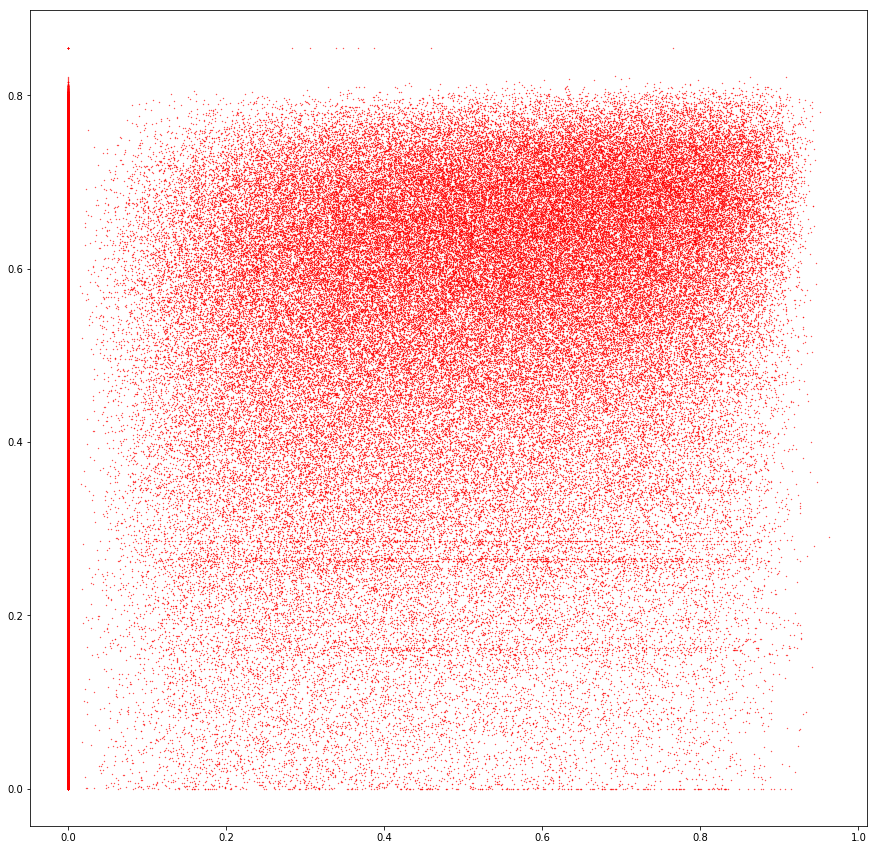

In [331]:
num_classes = len(np.unique(data.TARGET))
palette = np.array(sns.color_palette("hls", num_classes))
plt.figure(figsize = (15,15))
#plt.scatter(data.query('TARGET == 1').EXT_SOURCE_2, data.query('TARGET == 1').EXT_SOURCE_3, s = 5, c = 'blue');
#plt.scatter(data.query('TARGET == 0').EXT_SOURCE_2, data.query('TARGET == 0').EXT_SOURCE_3, s = 0.1, c = 'red');
plt.scatter(data.query('TARGET == 0').EXT_SOURCE_1, data.query('TARGET == 0').EXT_SOURCE_2, s = 0.1, c = 'red');

In [313]:
np.max(data.EXT_SOURCE_2)

0.8549996664047012

In [403]:
tsne_res = dict()
for i in range(5, 55, 5):
    tsne = TSNE(random_state = 42, perplexity = i)
    tsne_res[i] = tsne.fit_transform(data_small)

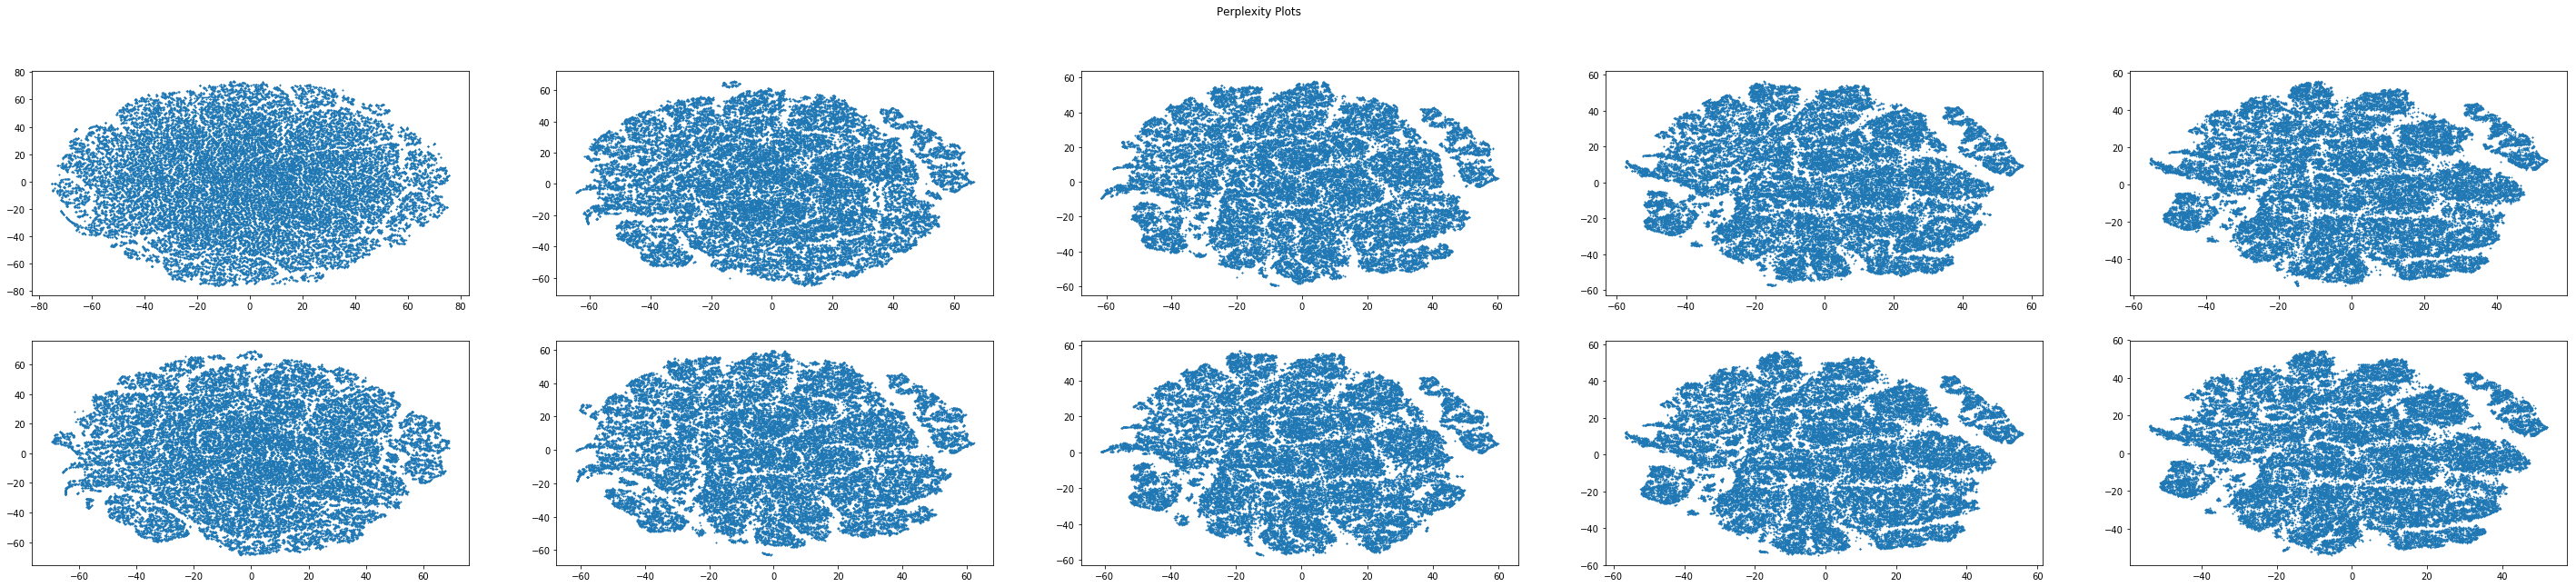

In [406]:
fig, ax = plt.subplots(2,5, figsize = (50,10));
fig.suptitle('Perplexity Plots');

for i, key in enumerate(tsne_res.keys()):
    if i % 2 == 0:
        ax[0, i // 2].scatter(
            tsne_res[key][:, 0],
            tsne_res[key][:, 1],
            s = 0.5
        )
    else:
        ax[1, (i - 1) // 2].scatter(
            tsne_res[key][:, 0],
            tsne_res[key][:, 1],
            s = 0.5
        )


In [397]:



tsne = TSNE(random_state=42, perplexity=15)
tnse_comp = tsne.fit_transform(data_small)


In [398]:
num_classes = len(np.unique(data_small.TARGET))
palette = np.array(sns.color_palette("hls", num_classes))

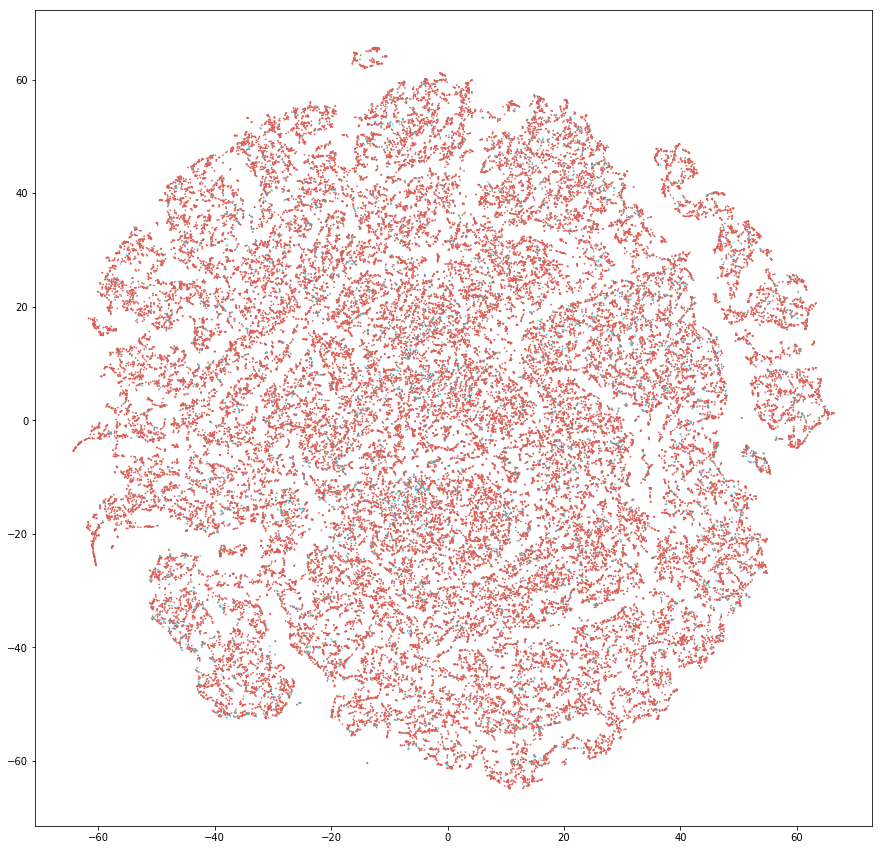

In [400]:
plt.figure(figsize = (15,15))
plt.scatter(tnse_comp[:, 0], tnse_comp[:, 1], c = palette[data_small.TARGET], s = 0.5)

In [139]:
run_times = 2
results = dict()

for cluster_size in [x for x in range(2,15,1)]:
    temp = list()
    for iterr in range(run_times):
        km = KMeans(n_clusters = cluster_size, random_state=42)
        km.fit(tnse_comp)
        temp.append(km.inertia_)
    results[cluster_size] = temp

In [140]:
vals = list()
keys = list()
for key in results.keys():
    vals.append(np.mean(results[key]))
    keys.append(key)
    print(key, np.mean(results[key]))

2 57196716.29482515
3 36137951.0149779
4 25405274.326246496
5 21065944.901626904
6 17326772.86128963
7 14358776.866874006
8 12606446.320959322
9 11352868.364792729
10 10218764.865795359
11 9223425.73371386
12 8360464.093146868
13 7689101.191378037
14 7040175.333992614


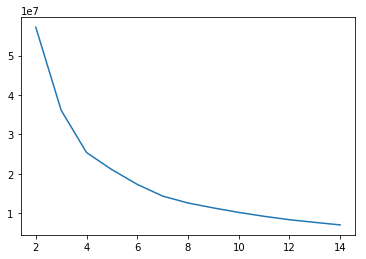

In [141]:
plt.plot(keys, vals)

In [146]:
km = KMeans(n_clusters = 6, random_state=42)
km.fit(tnse_comp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

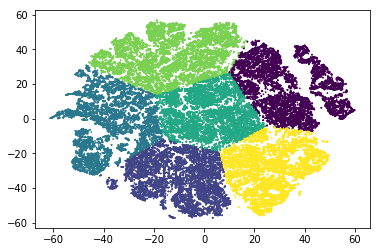

In [147]:
plt.scatter(tnse_comp[:, 0], tnse_comp[:, 1], c = km.labels_, s = 0.5)

## DBSCAN

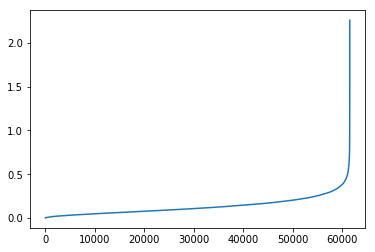

In [183]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(tnse_comp)
distances, indices = nbrs.kneighbors(tnse_comp)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [279]:
dbs = DBSCAN(eps = 0.5, min_samples = 5)
dbs.fit(tnse_comp)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [280]:
np.unique(dbs.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [302]:
silhouette_score(tnse_comp, dbs.labels_)

-0.18357298

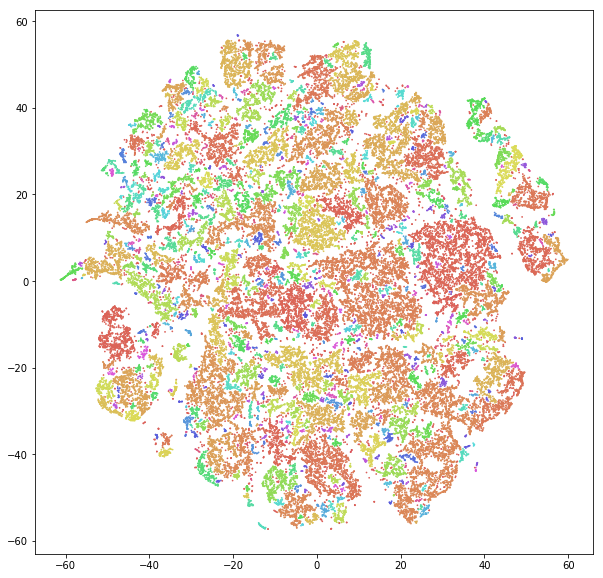

In [281]:
num_classes = len(np.unique(dbs.labels_))
palette = np.array(sns.color_palette("hls", num_classes))
plt.figure(figsize = (10,10))
plt.scatter(tnse_comp[:, 0], tnse_comp[:, 1], c = palette[dbs.labels_], s = 0.5)

In [296]:
opt = OPTICS(min_samples = 20)
opt.fit(tnse_comp)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=20, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [297]:
np.max(opt.labels_)

734

In [301]:
silhouette_score(tnse_comp, opt.labels_)

-0.272339

In [24]:
def tsne_clusters(tsne, labels, s = 0.5, figsize = (10,10)):
    """Plot tsne 2D composition
    """
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    plt.figure(figsize = figsize)
    plt.scatter(tsne[:, 0], tsne[:, 1], c = palette[labels], s = s);

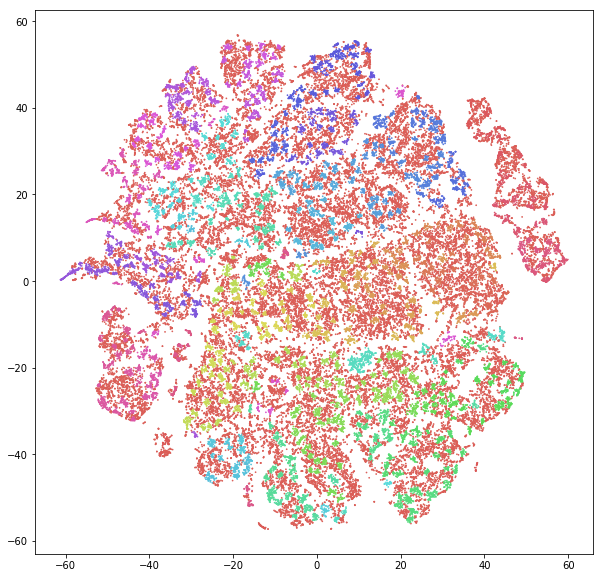

In [299]:
tsne_clusters(tnse_comp, opt.labels_)

In [303]:
min_samples = [n for n in range(5, 25, 2)]

In [415]:
data_small.shape[1]

328

## **PCA**

In [2]:
from sklearn.decomposition import PCA

In [3]:
# read in the data without imputions that are distribution dependent
data =  pd.read_csv('../_data/std_df.csv')

In [4]:
data.shape

(307511, 260)

In [15]:
data_small = data.sample(frac = 0.2)
data_small.shape

(61502, 260)

In [16]:
pca = PCA(n_components = 200,
         random_state = 42)
pca.fit(data_small)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

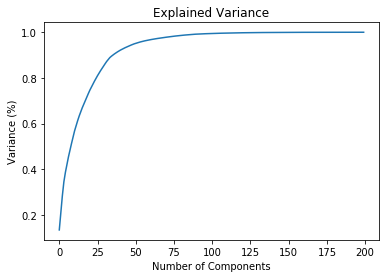

In [17]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [18]:
pca.explained_variance_ratio_[np.cumsum(pca.explained_variance_ratio_) < 0.99].size

87

In [20]:
pca_components = pca.transform(data_small)
pca_components = pca_components[:,:88]

In [32]:
km = KMeans(n_clusters = 5).fit(pca_components)

In [33]:
pd.Series(km.labels_).value_counts()

2    34499
3    14859
0     8888
1     3254
4        2
dtype: int64

In [34]:
silhouette_score(pca_components, km.labels_)

0.09895855986225222

In [35]:
km.inertia_

3110259.031016012

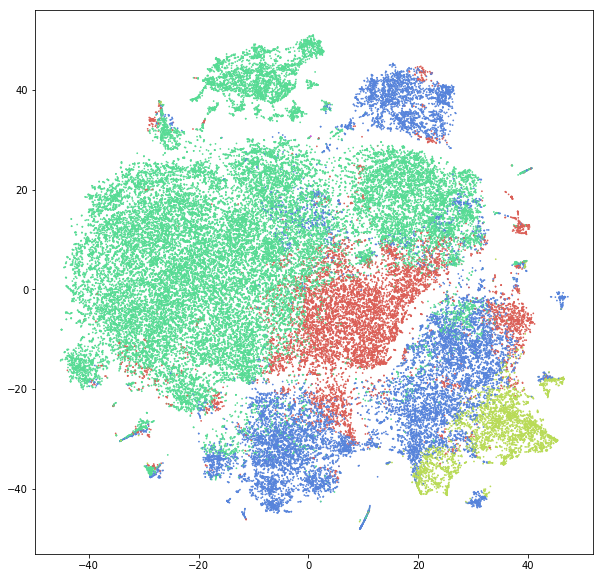

In [36]:
# calculate tsne
tsne = TSNE(random_state=42, perplexity=30)
tnse_comp = tsne.fit_transform(pca_components)
# plot clusted PCA with TSNE
tsne_clusters(tnse_comp, km.labels_)

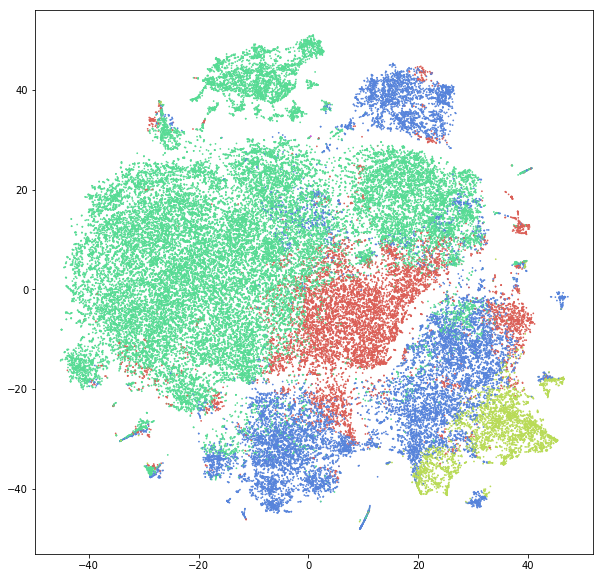

In [37]:
# plot clusted PCA with TSNE
tsne_clusters(tnse_comp, km.labels_)

In [104]:
score = list()
inertia = list()
for k in [x for x in range(3, 28, 2)]:
    km = KMeans(n_clusters = k, random_state = 42).fit(pca_components)
    score.append(silhouette_score(pca_components, km.labels_))
    inertia.append(km.inertia_)

In [105]:
for s, i in zip(score, inertia):
    print(s, i)

0.14390026166620623 16288328.557928987
0.06461667091270759 15310008.809632841
0.06570105181483064 14625009.22932808
0.0504829145944632 14031012.04072044
0.07104298290775059 13407793.505957324
0.07215413669365295 12985020.479700183
0.0598156424478435 12596837.098990167
0.05038804509889941 12275674.776492735
0.05673339125229053 11844553.815763548
0.059812535948933945 11300472.821296688
0.05913070207882458 11043703.92343282
0.05889638852208086 10726960.877287762
0.06350183701379708 10340494.36401254


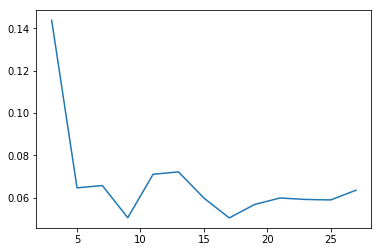

In [108]:
plt.plot([x for x in range(3, 28, 2)], score)

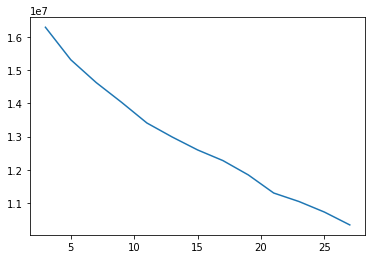

In [109]:
plt.plot([x for x in range(3, 28, 2)], inertia)

In [ ]:
# fit chosen clusters
km = KMeans(n_clusters = 5, random_state = 42).fit(pca_components)
# calculate tsne
tsne = TSNE(random_state=42, perplexity=30)
tnse_comp = tsne.fit_transform(pca_components)
# plot clusted PCA with TSNE
tsne_clusters(tnse_comp, km.labels_)

## **Autoencoder**

In [7]:
import tensorflow as tf
from functools import partial
import sys
from project_code.cleaning import read_clean_data
from sklearn.preprocessing import StandardScaler
from tensorflow.python.client import device_lib

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

In [8]:
# read in the data without imputions that are distribution dependent
data =  read_clean_data('../_data/application_train.csv', preimpute = True)

/home/stuart/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [9]:
cols_encode = ['ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE',
              'NAME_FAMILY_STATUS','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE',
              'NAME_HOUSING_TYPE','NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'TARGET', 'CREDIT_LENGTH']

le = LabelEncoder()
for col in cols_encode:
    data[col] = le.fit_transform(data[col])

In [10]:
data = StandardScaler().fit_transform(data)

In [51]:
# read in the data without imputions that are distribution dependent
data =  pd.read_csv('../_data/std_df.csv')

In [70]:
data.shape[1]

260

In [56]:

#reset_graph()

n_inputs = data.shape[1]
n_hidden1 = 128
n_hidden2 = 32
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
#Equivalent to:
#he_init = lambda shape, dtype=tf.float32: tf.truncated_normal(shape, 0., stddev=np.sqrt(2/shape[0]))
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1, activation='tanh')
#hidden1 = tf.nn.dropout(hidden1, 0.2)
hidden2 = my_dense_layer(hidden1, n_hidden2, activation='tanh')
hidden3 = my_dense_layer(hidden2, n_hidden3, activation='tanh')
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [57]:

batch_size = 10000
n_batches = data.shape[0] // batch_size
batch_indicies = np.arange(0, 150 * n_batches, 150)
#batch_indicies = np.append(batch_indicies, data_small.shape[0]-1)

In [ ]:
n_epochs = 300

MSE_values = np.zeros(n_epochs)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(n_batches - 1):
            #print("{}: \r{}%".format(epoch, 100 * iteration // n_batches), end="") # not shown in the book
            sys.stdout.flush()                                          # not shown
            X_batch = data[ batch_indicies[iteration] : batch_indicies[iteration + 1] ]
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   # not shown
        #print("\r{}".format(epoch), "Train MSE:", loss_train)           # not shown
        MSE_values[epoch] = loss_train
        #saver.save(sess, "./my_model_all_layers.ckpt")                  # not shown
print('done')

In [ ]:
plt.plot(MSE_values);
plt.xlabel('epoch')
plt.ylabel('MSE');
plt.title('Autoencoder Training');